In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go

plotly = False

In [2]:
data = pd.read_csv('APPL.csv',parse_dates=True, index_col=0)
series = data.Close
series.tail()

Date
2018-03-04    176.21
2018-03-11    179.98
2018-03-18    178.02
2018-03-25    164.94
2018-04-01    168.34
Name: Close, dtype: float64

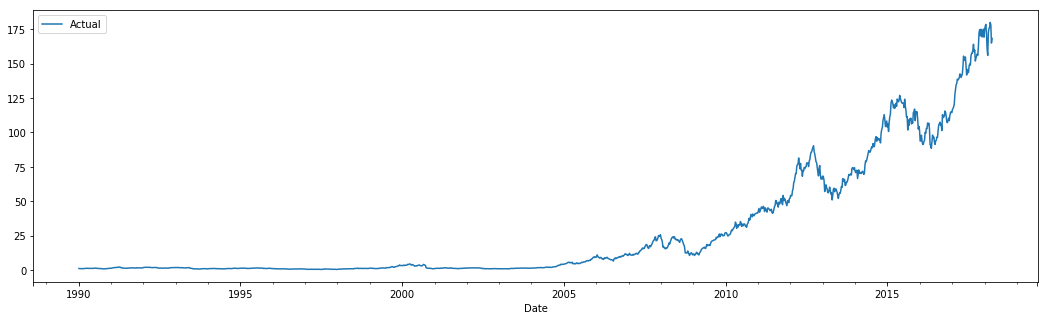

In [3]:
plt.figure(figsize=(18,5))
series.plot(label="Actual",legend=True)

In [4]:
import math
last = data.shape[0]-math.ceil(.2*(data.shape[0]))

### AutoRegression

In [5]:
from statsmodels.tsa.ar_model import AR
ar  = AR(series[:last],series.index[:last],freq='W')
ar = ar.fit()
ar.k_ar

/home/aditya/.conda/envs/py3k/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning:

The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.



22

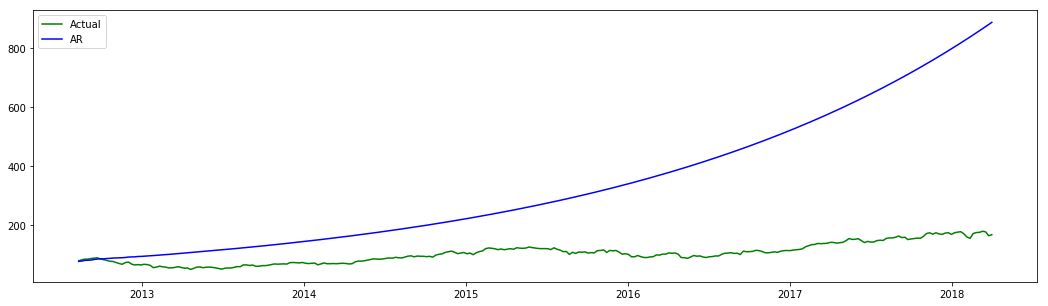

In [6]:
org = series[last:]
pred = ar.predict(start=series.index[last],end=series.index[-1])
if plotly:
    original = go.Scatter( x = org.index, y = org, name = "Actual", line=dict( color='green'))
    predicted = go.Scatter( x = pred.index, y = pred, name = "AR", line=dict( color='blue'))
    plots = [original,predicted]
    py.iplot(plots, filename='our predictions')
else:
    plt.figure(figsize=(18,5))
    plt.plot(org.index,org,'g',label="Actual",)
    plt.plot(pred.index,pred,'b',label="AR")
    plt.legend()

In [7]:
from sklearn.metrics import mean_absolute_error,r2_score
print("Mean Absolute Error :{}".format(mean_absolute_error(pred,org)))
print("R Square : {}".format(r2_score(pred,org)))

Mean Absolute Error :231.7735139077332
R Square : -0.8258585883775593
